In [1]:
import math
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
from sklearn.datasets import *

(200, 2)


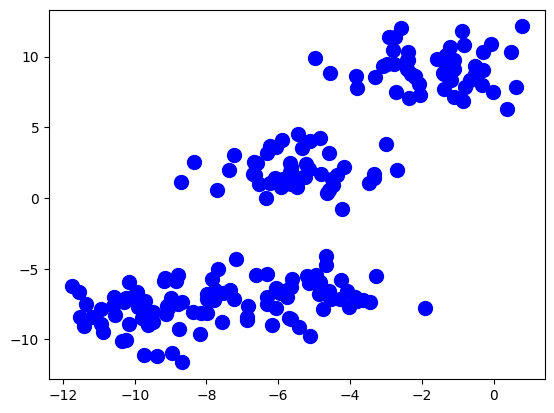

In [2]:
# Generate a set of 100 datapoints from 4 clusters. We will also ploit it out to see what it looks like.

original_X, X_shapes = make_blobs(200, 2, centers=4, cluster_std=1.3)
print(original_X.shape)
plt.plot(original_X[:,0], original_X[:,1], 'bo', markersize = 10)

In [5]:
def euclid_distance(x, xi):
    return np.sqrt(np.sum((x - xi)**2))

def neighbourhood_points(X, x_centroid, distance = 5):
    eligible_X = []
    for x in X:
        distance_between = euclid_distance(x, x_centroid)
        # print('Evaluating: [%s vs %s] yield dist=%.2f' % (x, x_centroid, distance_between))
        if distance_between <= distance:
            eligible_X.append(x)
    return eligible_X

def gaussian_kernel(distance, bandwidth):
    val = (1/(bandwidth*math.sqrt(2*math.pi))) * np.exp(-0.5*((distance / bandwidth))**2)
    return val

In [4]:
look_distance = 6  # How far to look for neighbours.
kernel_bandwidth = 4  # Kernel parameter.

In [6]:
X = np.copy(original_X)
# print('Initial X: ', X)

past_X = []
n_iterations = 10
for it in range(n_iterations):
    print('Iteration [%d]' % (it))    

    for i, x in enumerate(X):
        ### Step 1. For each datapoint x ∈ X, find the neighbouring points N(x) of x.
        neighbours = neighbourhood_points(X, x, look_distance)
        # print('[%s] has neighbours [%d]' % (x, len(neighbours)))
        
        ### Step 2. For each datapoint x ∈ X, calculate the mean shift m(x).
        numerator = 0
        denominator = 0
        for neighbour in neighbours:
            distance = euclid_distance(neighbour, x)
            weight = gaussian_kernel(distance, kernel_bandwidth)
            numerator += (weight * neighbour)
            denominator += weight
        
        new_x = numerator / denominator
        
        ### Step 3. For each datapoint x ∈ X, update x ← m(x).
        X[i] = new_x
    
    # print('New X: ', X)
    past_X.append(np.copy(X))

Iteration [0]
Iteration [1]
Iteration [2]
Iteration [3]
Iteration [4]
Iteration [5]
Iteration [6]
Iteration [7]
Iteration [8]
Iteration [9]


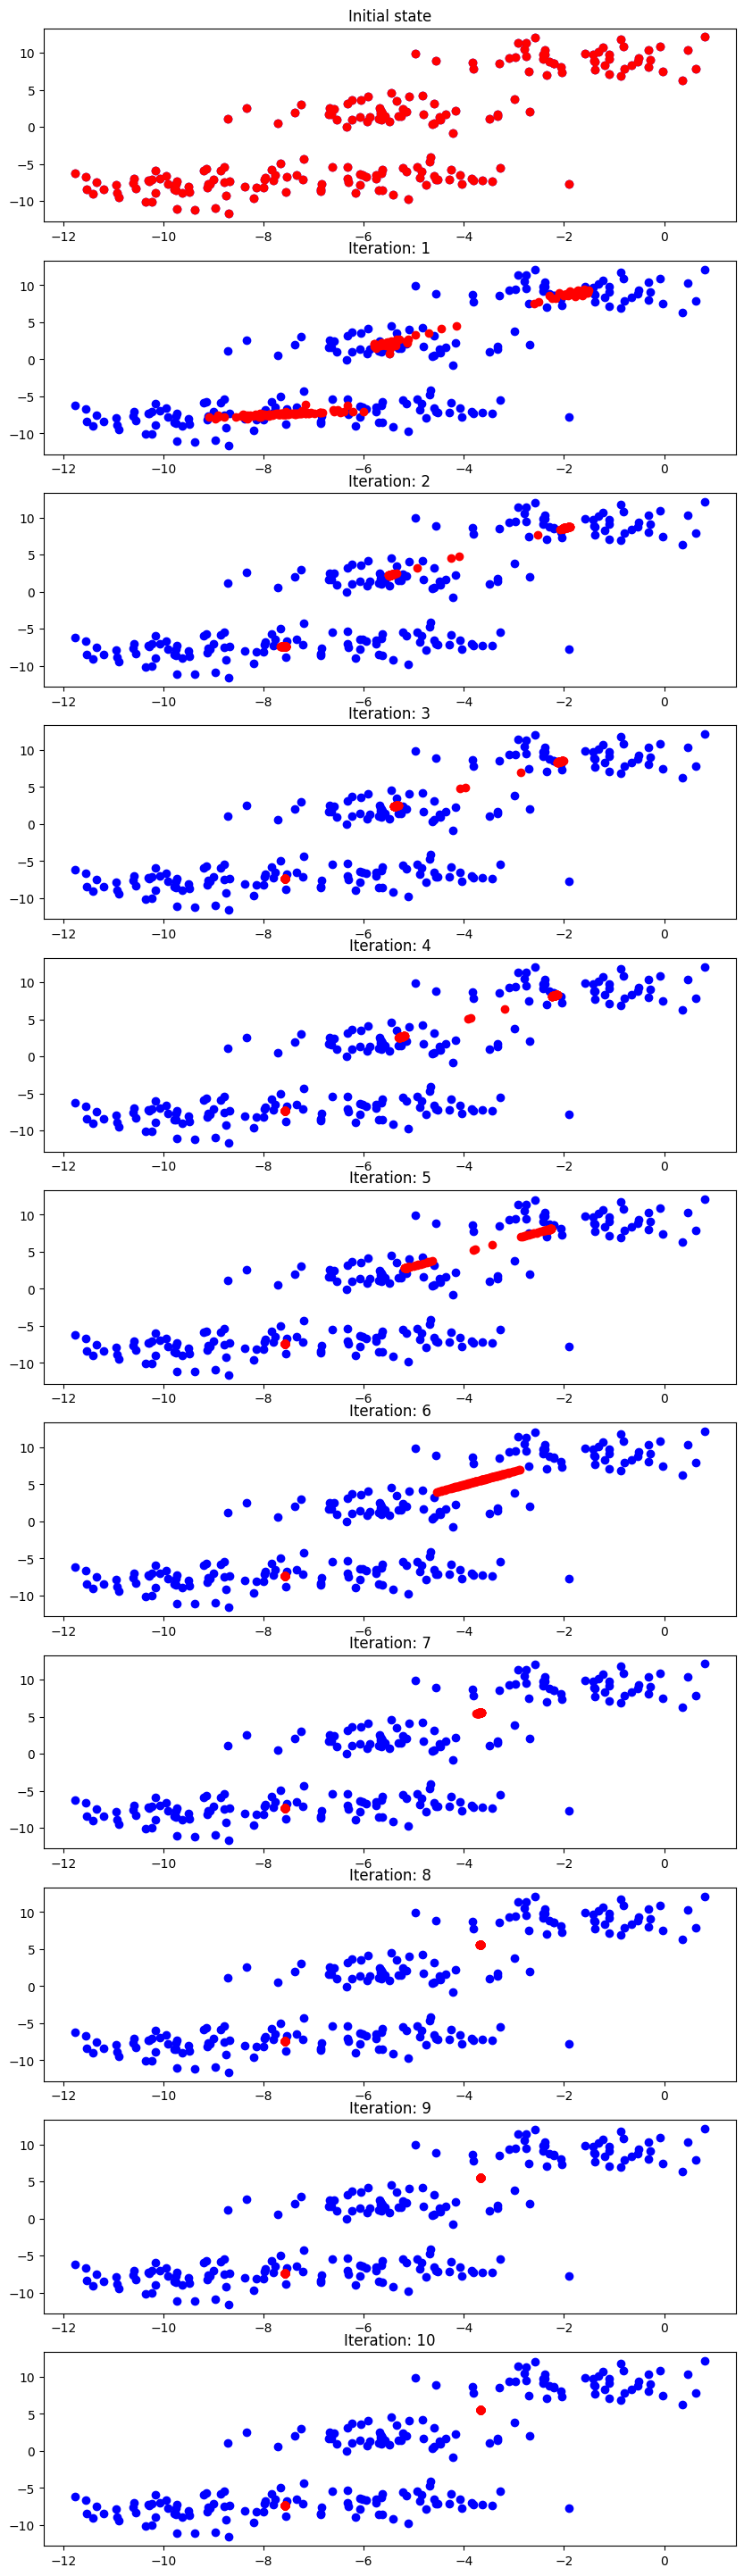

In [7]:
figure = plt.figure(1)
# figure.set_size_inches((10, 16))
figure.set_size_inches((10, 40))
plt.subplot(n_iterations + 2, 1, 1)
plt.title('Initial state')
plt.plot(original_X[:,0], original_X[:,1], 'bo')
plt.plot(original_X[:,0], original_X[:,1], 'ro')

for i in range(n_iterations):
    figure_index = i + 2
    plt.subplot(n_iterations + 2, 1, figure_index)
    plt.title('Iteration: %d' % (figure_index - 1))
    plt.plot(original_X[:,0], original_X[:,1], 'bo')
    plt.plot(past_X[i][:,0], past_X[i][:,1], 'ro')